# Creating a feature matrix from a networkx graph

In this notebook we will look at a few ways to quickly create a feature matrix from a networkx graph.

In [1]:
import networkx as nx
import pandas as pd

G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


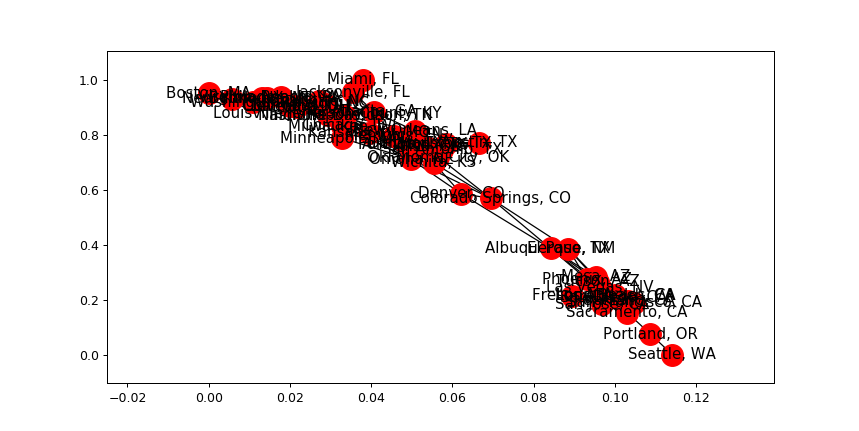

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
nx.draw_networkx(G)

## Node based features

In [3]:
G.nodes(data=True)

[('El Paso, TX', {'location': (-106, 31), 'population': 674433}),
 ('Long Beach, CA', {'location': (-118, 33), 'population': 469428}),
 ('Dallas, TX', {'location': (-96, 32), 'population': 1257676}),
 ('Oakland, CA', {'location': (-122, 37), 'population': 406253}),
 ('Albuquerque, NM', {'location': (-106, 35), 'population': 556495}),
 ('Baltimore, MD', {'location': (-76, 39), 'population': 622104}),
 ('Raleigh, NC', {'location': (-78, 35), 'population': 431746}),
 ('Mesa, AZ', {'location': (-111, 33), 'population': 457587}),
 ('Arlington, TX', {'location': (-97, 32), 'population': 379577}),
 ('Sacramento, CA', {'location': (-121, 38), 'population': 479686}),
 ('Wichita, KS', {'location': (-97, 37), 'population': 386552}),
 ('Tucson, AZ', {'location': (-110, 32), 'population': 526116}),
 ('Cleveland, OH', {'location': (-81, 41), 'population': 390113}),
 ('Louisville/Jefferson County, KY',
  {'location': (-85, 38), 'population': 609893}),
 ('San Jose, CA', {'location': (-121, 37), 'popul

In [4]:
# Initialize the dataframe, using the nodes as the index
df = pd.DataFrame(index=G.nodes())

### Extracting attributes

Using `nx.get_node_attributes` it's easy to extract the node attributes in the graph into DataFrame columns.

In [6]:
df['location'] = pd.Series(nx.get_node_attributes(G, 'location'))
df['population'] = pd.Series(nx.get_node_attributes(G, 'population'))

df.head(10)

,location,population
"El Paso, TX","(-106, 31)",674433
"Long Beach, CA","(-118, 33)",469428
"Dallas, TX","(-96, 32)",1257676
"Oakland, CA","(-122, 37)",406253
"Albuquerque, NM","(-106, 35)",556495
"Baltimore, MD","(-76, 39)",622104
"Raleigh, NC","(-78, 35)",431746
"Mesa, AZ","(-111, 33)",457587
"Arlington, TX","(-97, 32)",379577
"Sacramento, CA","(-121, 38)",479686


### Creating node based features

Most of the networkx functions related to nodes return a dictionary, which can also easily be added to our dataframe.

In [7]:
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())

df

,location,population,clustering,degree
"El Paso, TX","(-106, 31)",674433,0.700000,5
"Long Beach, CA","(-118, 33)",469428,0.745455,11
"Dallas, TX","(-96, 32)",1257676,0.763636,11
"Oakland, CA","(-122, 37)",406253,1.000000,8
"Albuquerque, NM","(-106, 35)",556495,0.523810,7
"Baltimore, MD","(-76, 39)",622104,0.800000,10
"Raleigh, NC","(-78, 35)",431746,0.615385,13
"Mesa, AZ","(-111, 33)",457587,0.750000,8
"Arlington, TX","(-97, 32)",379577,0.763636,11
"Sacramento, CA","(-121, 38)",479686,0.777778,9


# Edge based features

In [8]:
G.edges(data=True)

[('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}),
 ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}),
 ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}),
 ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}),
 ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046}),
 ('Long Beach, CA', 'Oakland, CA', {'weight': 579.5829987228403}),
 ('Long Beach, CA', 'Mesa, AZ', {'weight': 590.156204210031}),
 ('Long Beach, CA', 'Sacramento, CA', {'weight': 611.0649790490104}),
 ('Long Beach, CA', 'Tucson, AZ', {'weight': 698.6566667728368}),
 ('Long Beach, CA', 'San Jose, CA', {'weight': 518.2330606219175}),
 ('Long Beach, CA', 'Fresno, CA', {'weight': 360.4704577972272}),
 ('Long Beach, CA', 'San Diego, CA', {'weight': 151.45008247402757}),
 ('Long Beach, CA', 'Phoenix, AZ', {'weight': 567.4125390872786}),
 ('Long Beach, CA', 'San Francisco, CA', {'weight': 585.6985397766858}),
 ('Long Beach, CA', 'Los Angeles, CA', {'weight': 31.6941956

In [10]:
# Initialize the dataframe, using the edges as the index
df = pd.DataFrame(index=G.edges())

### Extracting attributes

Using `nx.get_edge_attributes`, it's easy to extract the edge attributes in the graph into DataFrame columns.

In [11]:
df['weight'] = pd.Series(nx.get_edge_attributes(G, 'weight'))

df

,weight
"(El Paso, TX, Albuquerque, NM)",367.885844
"(El Paso, TX, Mesa, AZ)",536.256660
"(El Paso, TX, Tucson, AZ)",425.413867
"(El Paso, TX, Phoenix, AZ)",558.783570
"(El Paso, TX, Colorado Springs, CO)",797.751712
"(Long Beach, CA, Oakland, CA)",579.582999
"(Long Beach, CA, Mesa, AZ)",590.156204
"(Long Beach, CA, Sacramento, CA)",611.064979
"(Long Beach, CA, Tucson, AZ)",698.656667
"(Long Beach, CA, San Jose, CA)",518.233061


### Creating edge based features

Many of the networkx functions related to edges return a nested data structures. We can extract the relevant data using list comprehension.

In [12]:
df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]

df

,weight,preferential attachment
"(El Paso, TX, Albuquerque, NM)",367.885844,35
"(El Paso, TX, Mesa, AZ)",536.256660,40
"(El Paso, TX, Tucson, AZ)",425.413867,40
"(El Paso, TX, Phoenix, AZ)",558.783570,45
"(El Paso, TX, Colorado Springs, CO)",797.751712,30
"(Long Beach, CA, Oakland, CA)",579.582999,88
"(Long Beach, CA, Mesa, AZ)",590.156204,88
"(Long Beach, CA, Sacramento, CA)",611.064979,99
"(Long Beach, CA, Tucson, AZ)",698.656667,88
"(Long Beach, CA, San Jose, CA)",518.233061,88


In the case where the function expects two nodes to be passed in, we can map the index to a lamda function.

In [13]:
df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))

df

,weight,preferential attachment,Common Neighbors
"(El Paso, TX, Albuquerque, NM)",367.885844,35,4
"(El Paso, TX, Mesa, AZ)",536.256660,40,3
"(El Paso, TX, Tucson, AZ)",425.413867,40,3
"(El Paso, TX, Phoenix, AZ)",558.783570,45,3
"(El Paso, TX, Colorado Springs, CO)",797.751712,30,1
"(Long Beach, CA, Oakland, CA)",579.582999,88,7
"(Long Beach, CA, Mesa, AZ)",590.156204,88,5
"(Long Beach, CA, Sacramento, CA)",611.064979,99,7
"(Long Beach, CA, Tucson, AZ)",698.656667,88,5
"(Long Beach, CA, San Jose, CA)",518.233061,88,7
